# ***PROJETO 2: PROGRAMAÇÃO EM PYTHON***
---
---
Análise dos dados da base IRIS:
*   Projeto desenvolvido individualmente como parte da avaliação do primeiro módulo de ensino da Trilha de Dados da escola Blue EdTech.
---
---
Aluno: Rodrigo Andreneli

Turma C014: MOD01

Professor: Guilherme Muzzi da Rocha

Professor assistente: Flávio Apolinário

## **Tarefas:**

Dado o contexto da seção anterior, as tarefas neste projeto são:

1 - Utilizar a árvore de decisão de cada modelo para classificar novas flores.

*   Criar uma função de classificação para cada modelo, a partir de suas respectivas árvores de decisão.
*   Classificar todas as novas flores, por meio destas funções.

2 - Definir o melhor modelo:

*   Definir um modo de medir a performance de cada modelo, a partir das classificações feitas pelos modelos e da real classificação da espécie.
*   Qual tipo de flor possui mais erros em sua classificação? Considere cada um dos modelos.
*   Comparar a performance dos modelos.

---
# ***APRESENTAÇÃO DOS MODELOS***
---
**ÁRVORE DE DECISÃO 1:**
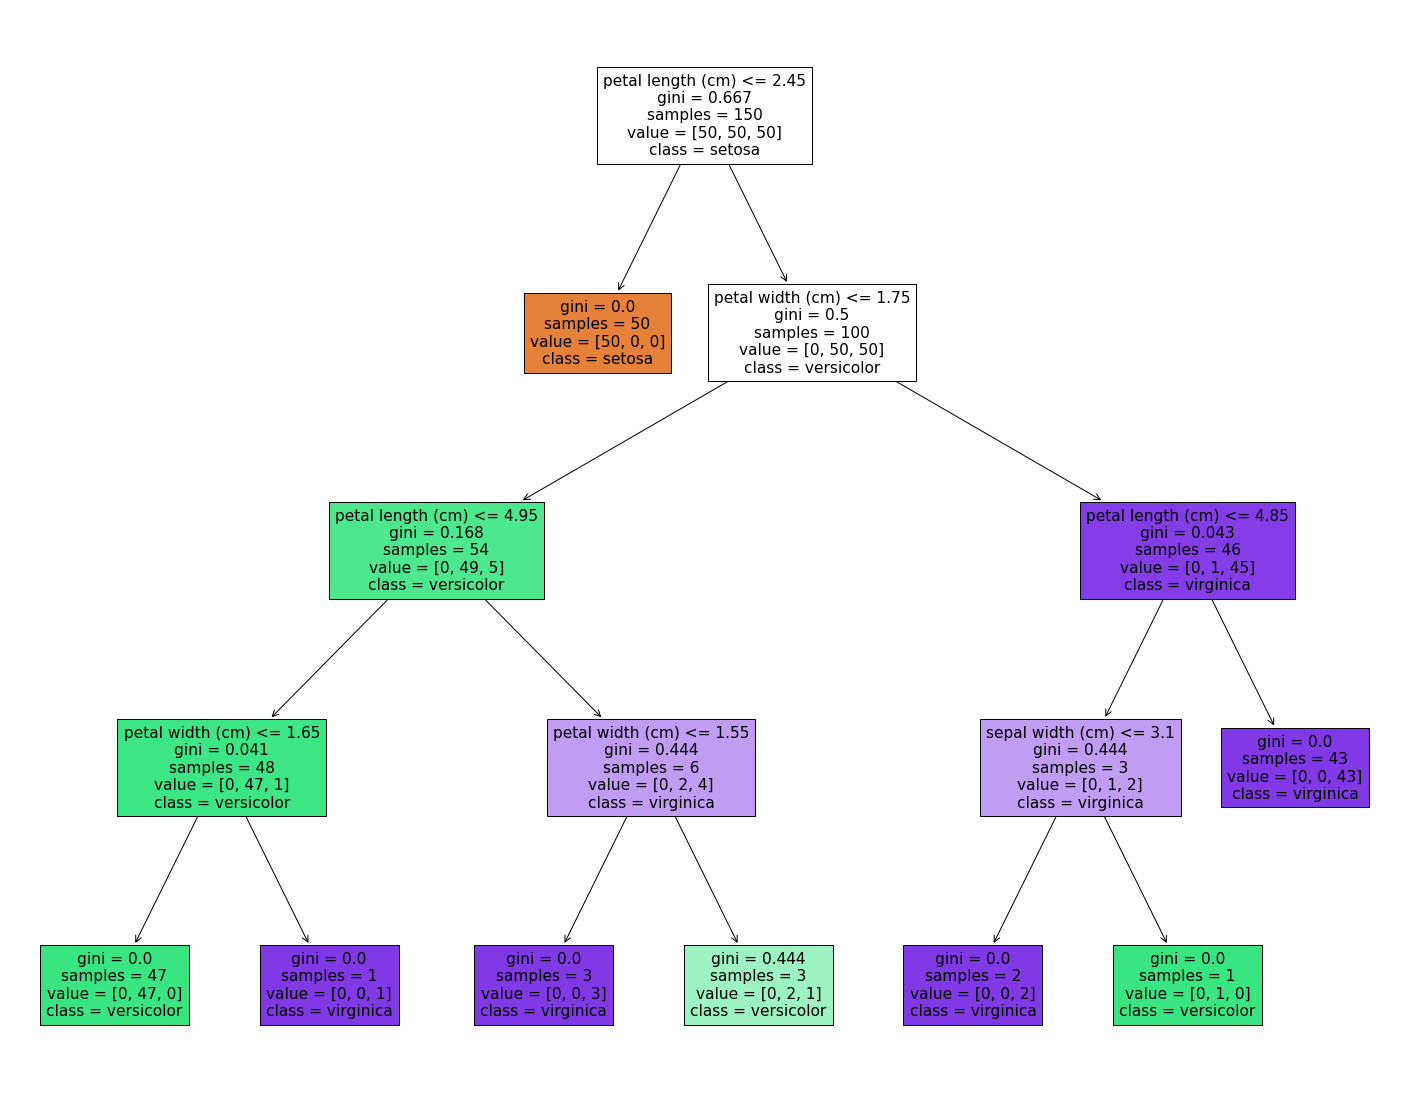

**ÁRVORE DE DECISÃO 2:**
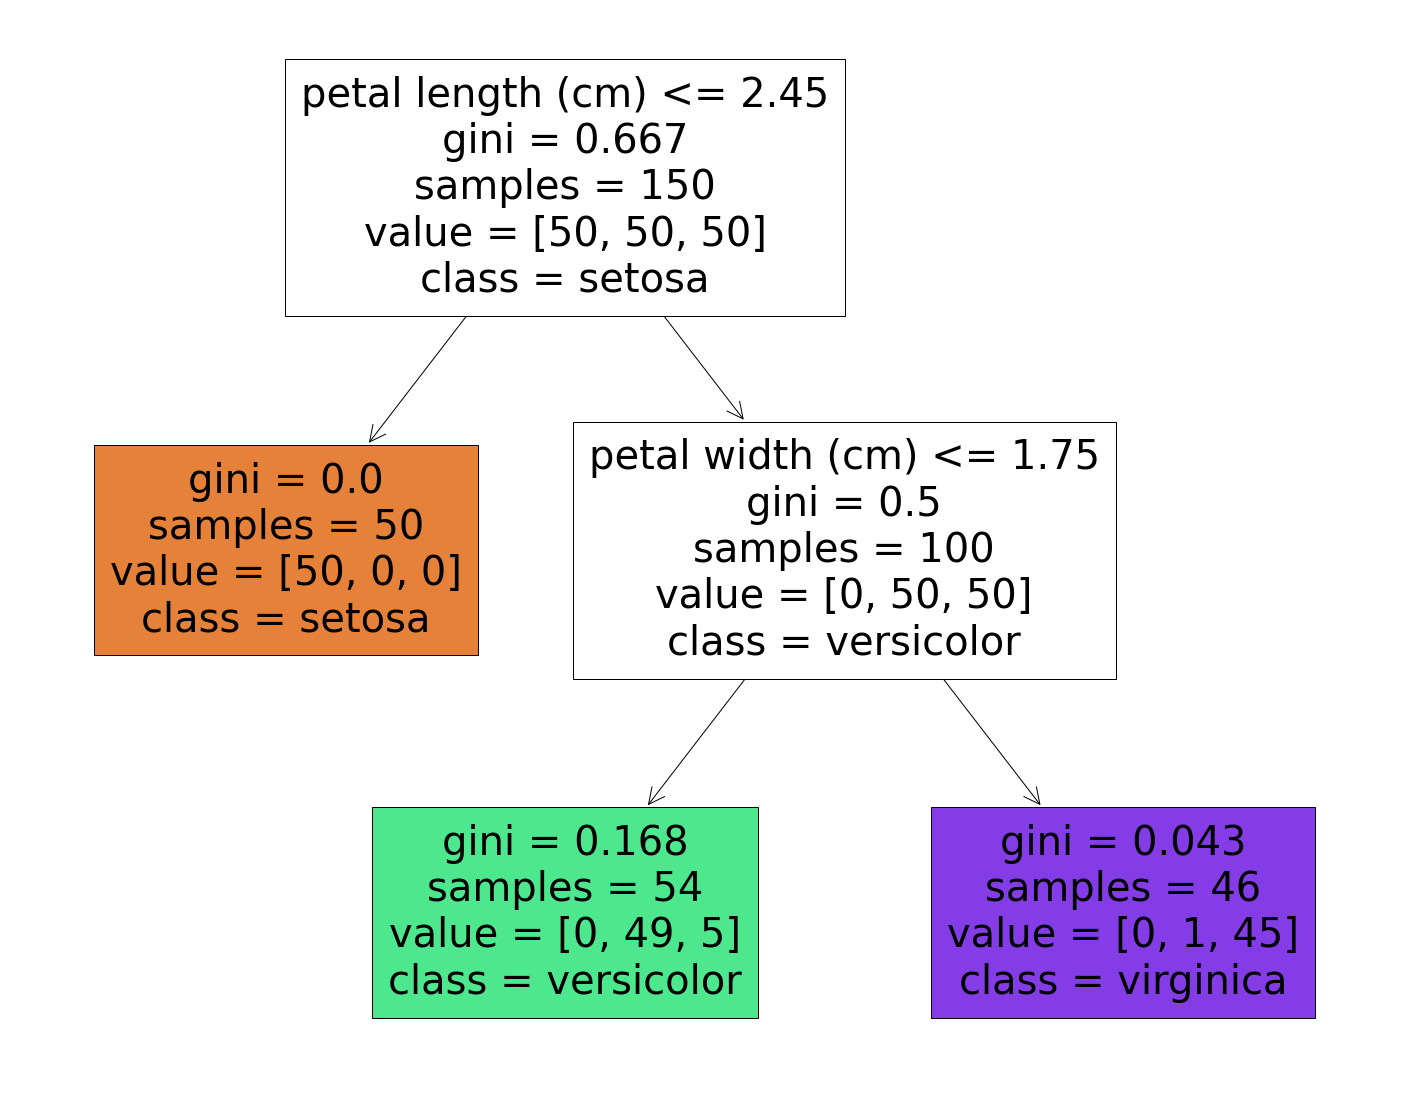

---
# ***Início da Análise dos dados***
---

Importação da base de dados e das bibliotecas Pandas e Nunpy.

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np

Recebendo as informações da base de dados e geração do dataframe.

In [ ]:
iris=datasets.load_iris()
df=pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns = iris['feature_names'] + ['target'])

Verificando a base e o dataframe.

In [ ]:
print(iris)

In [ ]:
print(df)
print('-----------------------------------------------------------------------------------------')
df.head()

---
# ***Criando as funções de classificação conforme os modelos***
---

Para a realização das análises, iremos seguir a proposta já utilizada na base de dados vista na coluna 'target' onde cada espécie de flor recebe uma numeração específica conforme abaixo:\
0.0 -> Espécie Setosa\
1.0 -> Espécie Versicolor\
2.0 -> Espécie Virginica



MODELO 1:

In [ ]:
def modelo1(df):
  if df['petal length (cm)'] <= 2.45:
    esp = 0.0
    return esp
  elif df['petal width (cm)'] <= 1.75:
    if df['petal length (cm)'] <= 4.95:
      if df['petal width (cm)'] <= 1.65:
        esp = 1.0
        return esp
      else:
        esp = 2.0
        return esp
    elif df['petal width (cm)'] <= 1.55:
      esp = 2.0
      return esp
    else:
      esp = 1.0
      return esp
  elif df['petal length (cm)'] <= 4.85:
    if df['sepal width (cm)'] <= 3.1:
      esp = 2.0
      return esp
    else:
      esp = 1.0
      return esp
  else:
    esp = 2.0
    return esp

MODELO 2:

In [ ]:
def modelo2(petal_length, petal_width, esp):
  if petal_length <= 2.45:
    esp = 0.0
    return esp
  elif petal_width <= 1.75:
    esp = 1.0
    return esp
  else:
    esp = 2.0
    return esp

---
# ***Classificando as espécies conforme os modelos***
---

MODELO 1: utilizando o método 'apply', criamos uma nova coluna no dataframe a qual recebe os valores da seleção realizada pela função.

In [ ]:
df['modelo 1'] = df.apply(modelo1,axis = 1)
print(df)
print('-------------------------------------------------------------------------------------------------')
df.head()

MODELO 2: utilizando laço 'for' e chamando a função dentro do modo 'append' para inclusão de dados na lista.

In [ ]:
listamod2 = []
for i in range(len(df.index)):
  listamod2.append(modelo2(df['petal length (cm)'][i], df['petal width (cm)'][i],df['target'][i]))
df['modelo 2'] = listamod2
print(df)
print('---------------------------------------------------------------------------------------------------------')
df.head()

---
# ***Iniciando a comparação entre os modelos de classificação***
---

Preparação de um dataframe somente com as informações das espécies da base de dados (coluna 'target') e das classificações dos modelos.

In [ ]:
df2 = df[['target','modelo 1','modelo 2']]
print(df2)
print('--------------------------------')
df2.head()

Definição da função de avaliação do modelo 1:

In [ ]:
def modelo1_aval(df):
  if df['target'] == df['modelo 1']:
    return 1
  else:
    return 0

Utilizando modo 'apply' juntamente com a aplicação da fórmula e criação de nova coluna no dataframe de classificação (df2) para inclusão dos dados.

In [ ]:
df2['modelo 1_aval'] = df2.apply(modelo1_aval,axis = 1)
print(df2)
print('-------------------------------------------------------------------------------------------------')
df2.head()

Definição da função de avaliação do modelo 2:

In [ ]:
def modelo2_aval(df):
  if df['target'] == df['modelo 2']:
    return 1
  else:
    return 0

Utilizando modo 'apply' juntamente com a aplicação da fórmula e criação de nova coluna no dataframe de classificação (df2) para inclusão dos dados.

In [ ]:
df2['modelo 2_aval'] = df2.apply(modelo2_aval,axis = 1)
print(df2)
print('-------------------------------------------------------------------------------------------------')
df2.head()

---
# ***Encontrando as flores classificadas erroneamente pelos modelos***
---

MODELO 1:

In [ ]:
erro1 = df2['modelo 1_aval'] == 0
df2[erro1]

,target,modelo 1,modelo 2,modelo 1_aval,modelo 2_aval
129,2.0,1.0,1.0,0,0


MODELO 2:

In [ ]:
erro2 = df2['modelo 2_aval'] == 0
df2[erro2]

,target,modelo 1,modelo 2,modelo 1_aval,modelo 2_aval
70,1.0,1.0,2.0,1,0
106,2.0,2.0,1.0,1,0
119,2.0,2.0,1.0,1,0
129,2.0,1.0,1.0,0,0
133,2.0,2.0,1.0,1,0
134,2.0,2.0,1.0,1,0


---
# ***Cálculo de performance dos modelos***
---

Neste tópico iremos realizar o cáculo da performance dos modelos, ou seja, iremos somar todos os acertos e dividir pelo total de flores classificadas. Desta forma saberemos a porcentagem de acerto de cada modelo e, por consequência, qual foi mais acertivo.

MODELO 1:

In [ ]:
calc1 = df2['modelo 1_aval'].sum()/150
acc1 = (calc1 * 100)
print('{:.2f}%'.format(acc1))

99.33%


MODELO 2:

In [ ]:
calc2 = df2['modelo 2_aval'].sum()/150
acc2 = (calc2 * 100)
print('{:.2f}%'.format(acc2))

96.00%


---
# ***Apresentação dos resultados***
---

In [ ]:
setosa = df['target'].value_counts()[0]
versicolor = df['target'].value_counts()[1]
virginica = df['target'].value_counts()[2]
setosa1 = df['modelo 1'].value_counts()[0]
versicolor1 = df['modelo 1'].value_counts()[1]
virginica1 = df['modelo 1'].value_counts()[2]
setosa2 = df['modelo 2'].value_counts()[0]
versicolor2 = df['modelo 2'].value_counts()[1]
virginica2 = df['modelo 2'].value_counts()[2]

In [ ]:
print('A base de dados apresenta {} flores setosas, {} flores versicolors e {} flores virginicas.\n'.format(setosa, versicolor, virginica))
print('O modelo 1 classificou {} flores como setosas, {} flores como versicolors e {} flores como virginicas.\n'.format(setosa1, versicolor1, virginica1))
print('O modelo 2 classificou {} flores como setosas, {} flores como versicolors e {} flores como virginicas.\n'.format(setosa2, versicolor2, virginica2))
print('Com base nas informações acima, temos que o modelo 1 atingiu {:.2f}% de acertividade enquanto o modelo 2 {:.2f}%.\n'.format(acc1, acc2))
print('A flor classificada erroneamente pelo modelo 1 esta na posição 129 da base de dados.\n')
print('As flores classificadas erroneamente pelo modelo 2 estão nas posições 70, 106, 119, 129, 133 e 134 da base de dados.')

A base de dados apresenta 50 flores setosas, 50 flores versicolors e 50 flores virginicas.

O modelo 1 classificou 50 flores como setosas, 51 flores como versicolors e 49 flores como virginicas.

O modelo 2 classificou 50 flores como setosas, 54 flores como versicolors e 46 flores como virginicas.

Com base nas informações acima, temos que o modelo 1 atingiu 99.33% de acertividade enquanto o modelo 2 96.00%.

A flor classificada erroneamente pelo modelo 1 esta na posição 129 da base de dados.

As flores classificadas erroneamente pelo modelo 2 estão nas posições 70, 106, 119, 129, 133 e 134 da base de dados.


---
# ***Conclusão***
---

Mediante os resultados obtidos pela análise dos dados gerados pelos modelos propostos, conclui-se que o modelo de classificação 1 retornou melhores valores em comparação aos valores do modelo de classificação 2, sendo assim, para a base de dados apresentada, o modelo 1 é a melhor opção a ser utilizada para realizar a classificação de novos valores.

**Observações do modelo 1:**
Conforme observou-se, o modelo classificou corretamente todas as flores das espécies setosa e versicolor, atingindo 100% de aproveitamento. Já para a espéice virginica, o modelo apresentou um erro, classificando a flor da posição 129 como versicolor, artingindo 98% de aproveitamento.

**Observações do modelo 2:**
Conforme observou-se, o modelo classificou corretamente todas as flores da espécie setosa e atingiu 100% de aproveitamento. Já para a espéice versicolor, o modelo apresentou um erro, classificando a flor da posição 70 como virginica, atingindo 98% de aproveitamento. Com a espécie virginca, o modelo apresentou cinco erros, classificando as flores das posições 106, 119, 129, 133 e 134 como versicolor, atingindo 90% de aproveitamento.

**Considerações finais:**
Tendo a ciência das observações apresentadas, podemos então inferir que a espécie mais difícil de ser classificada é a virginica, pois ambos os modelos apresentaram erros em sua classificação.